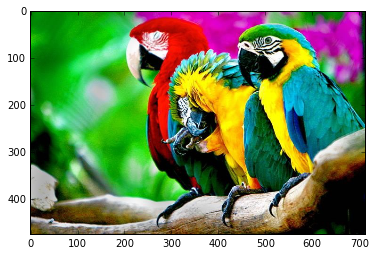

In [4]:
import numpy as np
import pylab
%matplotlib inline
from skimage.io import imread
img = imread("data/parrots.jpg")
pylab.imshow(img)


In [8]:
from skimage import img_as_float
fimg = img_as_float(img)

In [15]:
r = fimg[:, :, 0].ravel()
g = fimg[:, :, 1].ravel()
b = fimg[:, :, 2].ravel()
rgb = np.transpose(np.vstack((r, g, b)))
rgb

array([[ 0.01176471,  0.49019608,  0.01568627],
       [ 0.01176471,  0.49019608,  0.01568627],
       [ 0.00784314,  0.49411765,  0.00784314],
       ..., 
       [ 0.03137255,  0.08235294,  0.10588235],
       [ 0.09411765,  0.14901961,  0.19215686],
       [ 0.09411765,  0.15686275,  0.21568627]])

In [19]:
from sklearn.cluster import KMeans
clf = KMeans(init='k-means++', random_state=241)
clf.fit(rgb)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=241, tol=0.0001,
    verbose=0)

In [23]:
centers = clf.cluster_centers_
centers

array([[ 0.05602134,  0.11828155,  0.05239668],
       [ 0.45428194,  0.66533623,  0.44180048],
       [ 0.09658721,  0.63583583,  0.06872657],
       [ 0.95256162,  0.82748764,  0.04762044],
       [ 0.78797017,  0.82374642,  0.79607477],
       [ 0.05032106,  0.54949125,  0.59263746],
       [ 0.60945637,  0.2150879 ,  0.06793373],
       [ 0.77562373,  0.09130278,  0.68926568]])

In [29]:
labels = clf.labels_
labels

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [30]:
clf.n_clusters

8

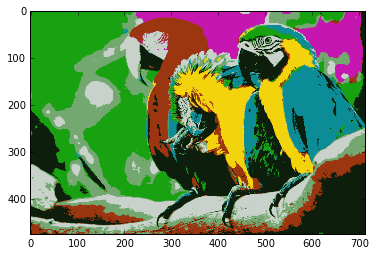

In [49]:
claster_img = np.reshape(labels, (-1, 713))
img_avg = np.copy(fimg)
for cluster in range(0, clf.n_clusters):
    img_avg[claster_img == cluster] = centers[cluster]
pylab.imshow(img_avg)

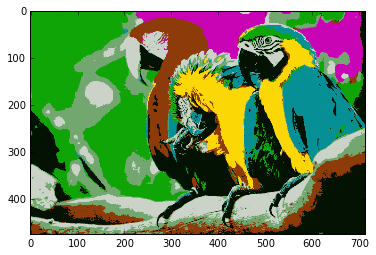

In [54]:
img_mean = np.copy(fimg)
for cluster in range(0, clf.n_clusters):
    median_r = np.median(img_mean[:, :, 0][claster_img == cluster])
    median_g = np.median(img_mean[:, :, 1][claster_img == cluster])
    median_b = np.median(img_mean[:, :, 2][claster_img == cluster])
    img_mean[claster_img == cluster] = [median_r, median_g, median_b]
pylab.imshow(img_mean)

In [61]:
def PSNR(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    psnr = 10 * np.math.log10(np.max(image1) / mse)
    return psnr

In [62]:
PSNR(fimg, img_avg)

18.484582884758275

In [64]:
PSNR(fimg, img_mean)

18.178430136182023

1 9.866444484956007
2 12.145041841854292
3 13.208138541687164
4 14.41629881846779
5 15.590772877765104
6 16.606663512284776
7 17.698964150234403
8 18.484582884758275
9 19.166796608512847
10 19.696639354198496
11 20.18281957831551
12 20.651758060691428
13 21.07734570453154
14 21.383951744143825
15 21.660613910874403
16 21.918540189673244
17 22.17748449007583
18 22.389349961167397
19 22.575973896687053
20 22.760757164186916


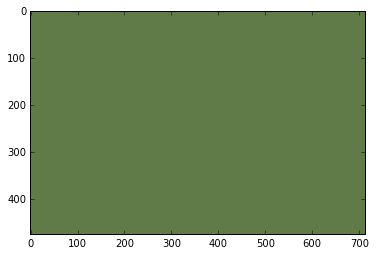

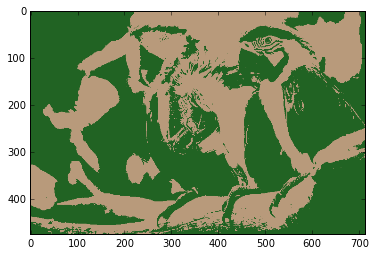

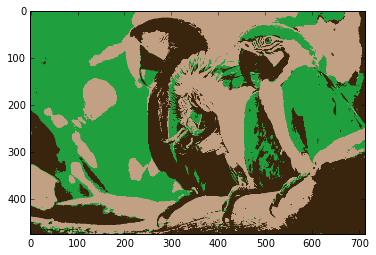

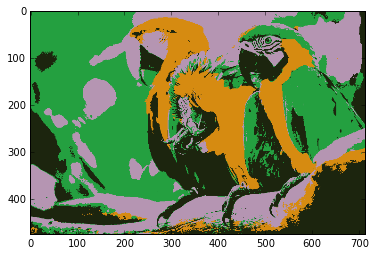

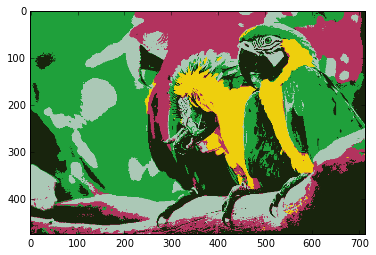

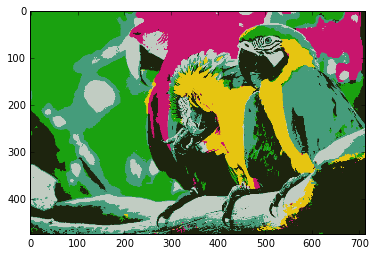

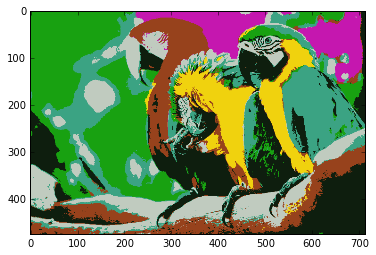

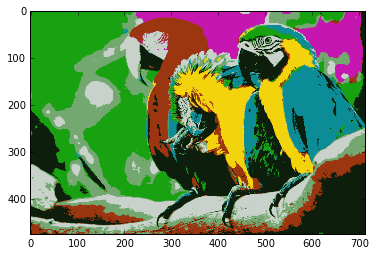

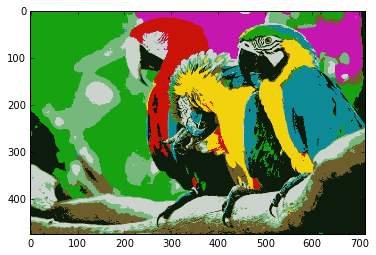

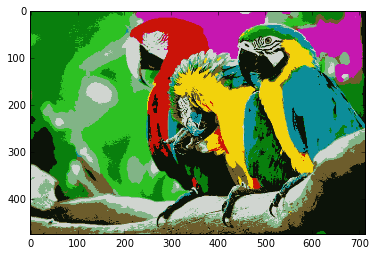

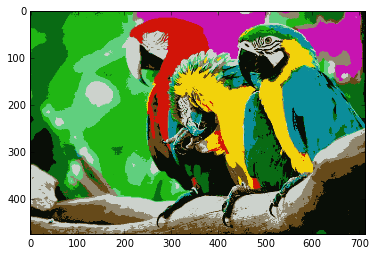

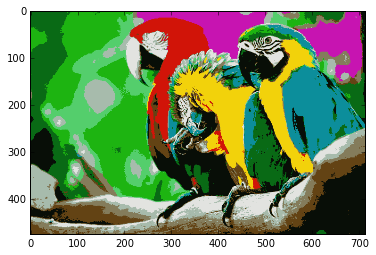

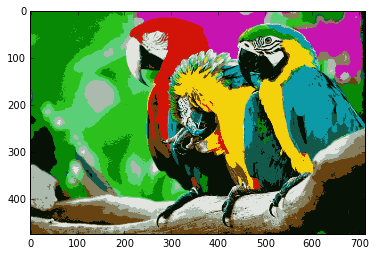

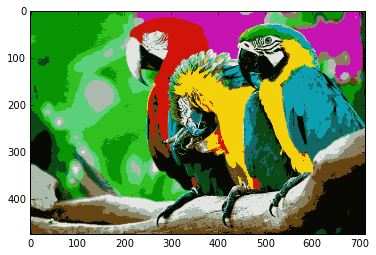

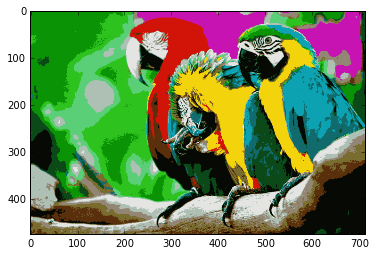

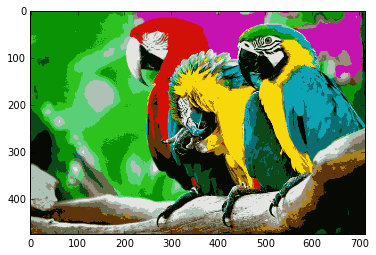

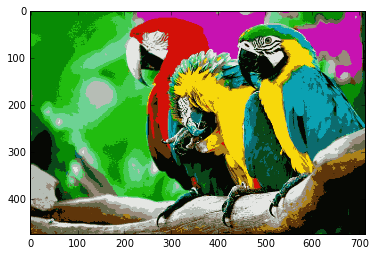

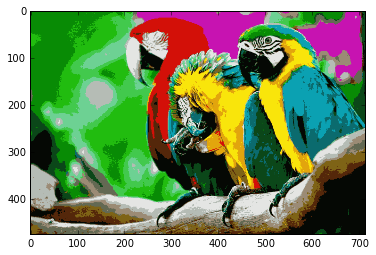

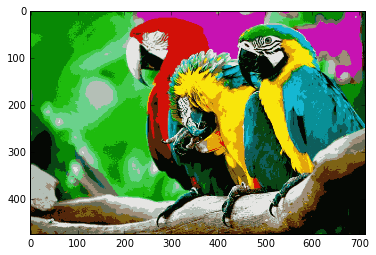

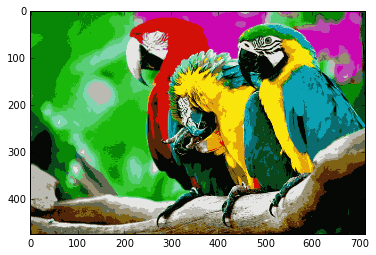

In [68]:
for i in range(1,21):
    clf = KMeans(n_clusters = i, init = 'k-means++', random_state = 241)
    clf.fit(rgb)
    labels = clf.labels_
    centers = clf.cluster_centers_
    claster_img = np.reshape(labels, (-1, 713))
    img_new = np.copy(fimg)
    for cluster in range(0, i):
        img_new[claster_img == cluster] = centers[cluster]
    print (i, PSNR(fimg, img_new))
    pylab.figure()
    pylab.imshow(img_new)